Goal: from human data, train an AI to predict cards to pick at card rewards or shops.

Refer to README.md for the installation.

# Create dataset

Requires official .run files. One .run represents one game of STS. From .run files, we try to reconstruct the deck state at each floor. This allows us to build a labeled dataset of (deck state, offered cards, picked cards).

In the official 'SlayTheData' dataset, several .run files are concatenated into .json files.

In [1]:
from sts_ml.deck_history import compile_datas, create_dataset

In [ ]:
compile_datas()

In [ ]:
create_dataset("SlayTheData_wins_ic.json")

# Train model

We ask a model to learn from the dataset. The Neural Net that we use is based on Multi Head Attention, which allows to have a model that can semantically well represent decks and prompts of various sizes.

In [2]:
from sts_ml.train import train, pursue_training

In [ ]:
train()

# Load model

In [1]:
from sts_ml.infer import plot_training_metrics, generate_metrics

In [2]:
model_name = "2023-02-02-21-40-52_blocks4-256_split0.8"

,Unnamed: 0,epoch,training_cross_ent_loss,training_top_inf_acc,training_top_true_acc,training_top_1_acc,val_cross_ent_loss,val_top_inf_acc,val_top_true_acc,val_top_1_acc
0,0,0,2.288779,0.462869,0.740234,0.745968,1.885785,0.274832,0.709635,0.704
1,1,1,1.799392,0.257867,0.690104,0.682731,1.800382,0.215451,0.652344,0.644
2,2,2,1.860400,0.210156,0.644531,0.634538,NaN,NaN,NaN,NaN
3,3,3,1.937135,0.210482,0.644531,0.637450,NaN,NaN,NaN,NaN
4,4,4,1.932346,0.212044,0.640625,0.627530,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
637,637,637,1.247515,0.172852,0.464565,0.464000,NaN,NaN,NaN,NaN
638,638,638,1.147452,0.164225,0.456380,0.449799,NaN,NaN,NaN,NaN
639,639,639,1.289605,0.187391,0.473958,0.474104,NaN,NaN,NaN,NaN
640,640,640,1.322908,0.193142,0.511719,0.509881,NaN,NaN,NaN,NaN


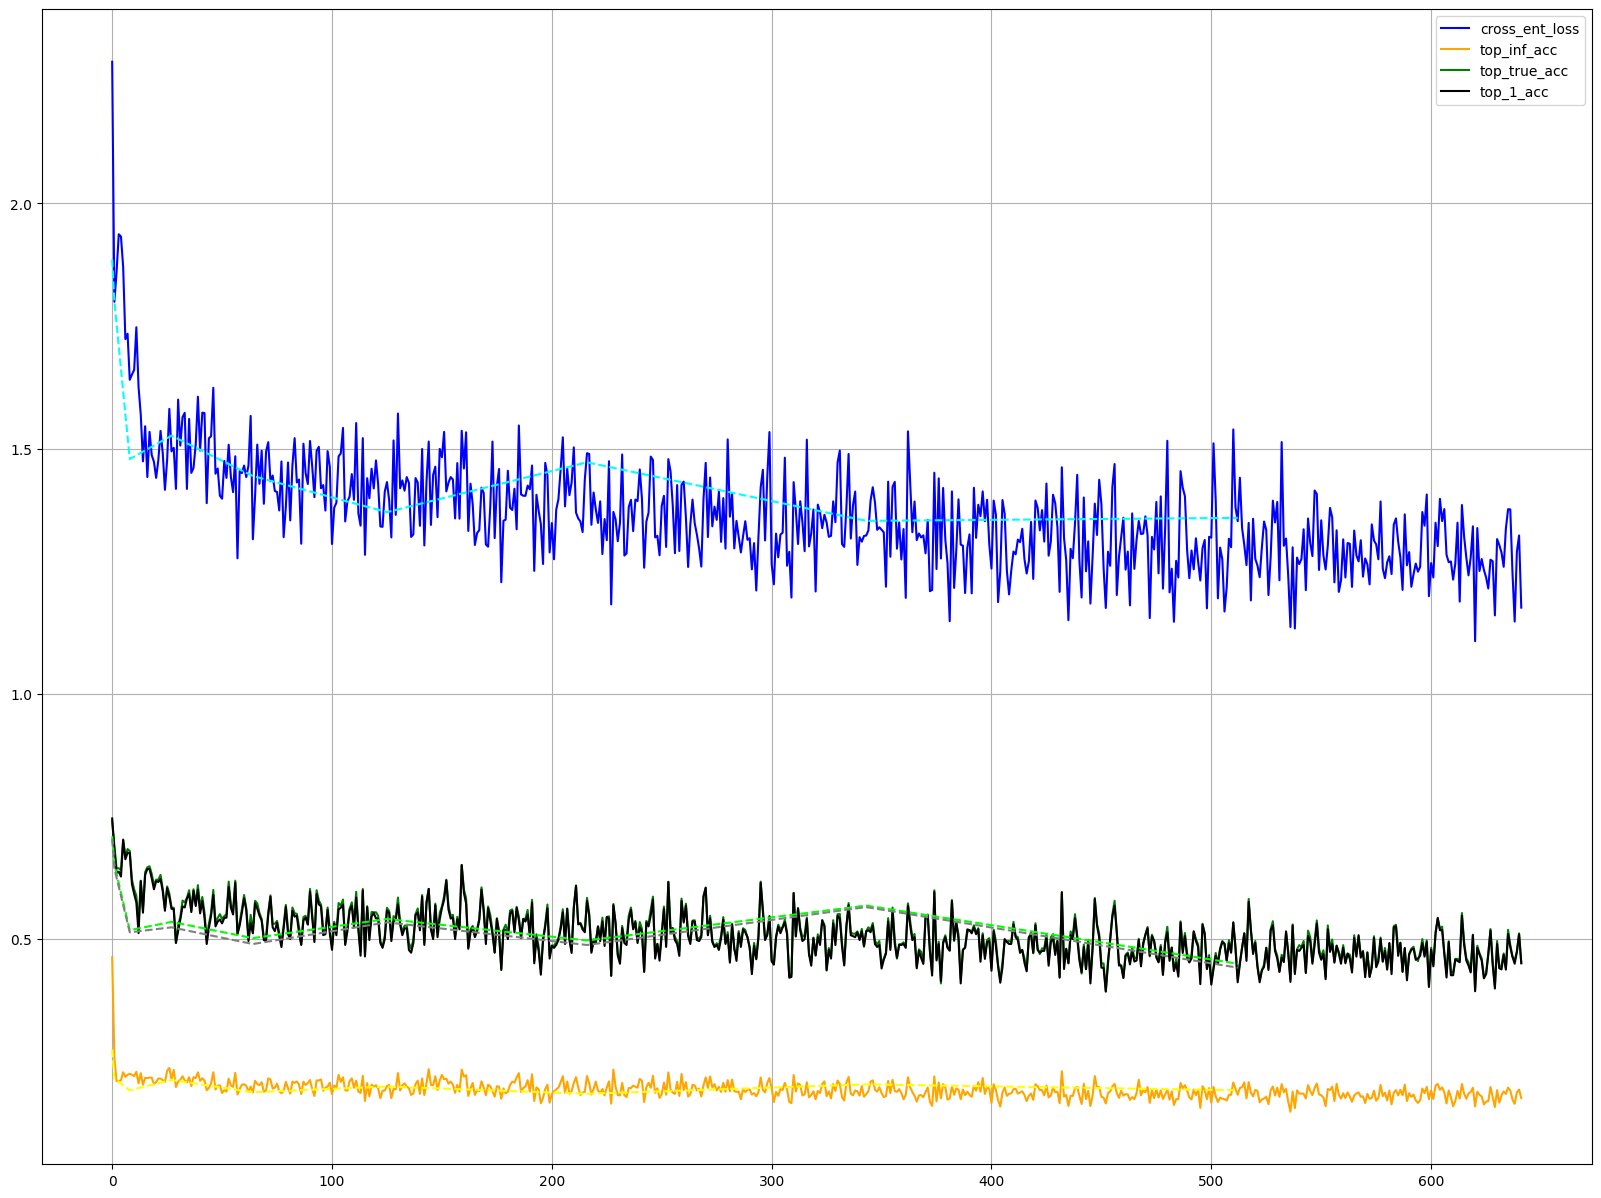

In [3]:
plot_training_metrics(model_name)